# Exploring clustering

In [1]:
import ast, gzip, json, pickle
import numpy as np
import pandas as pd
from IPython.display import HTML

In [2]:
def read_file(name):
    contents = None
    with gzip.open(name) as f:
        contents = pickle.load(f)
    return contents

movies_df = read_file('df_movies.pkl.gz')
characters_df = read_file('df_characters.pkl.gz')
lines_df = read_file('df_lines.pkl.gz')
conversations_df = read_file('df_conversations.pkl.gz')

In [3]:
print(len(movies_df))
movies_df.head(2)

617


,title,year,imdb_rating,no_imdb_votes,genres
movieID,,,,,
m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"
m1,1492: conquest of paradise,1992,6.2,10421,"['adventure', 'biography', 'drama', 'history']"


In [4]:
movies_genre_df = pd.DataFrame(columns=('movieID', 'title', 'genre', 'lines'))

In [7]:
def fill_out_movies_genre_df():
    for movie in list(movies_df.iterrows()):
        genres = ast.literal_eval(movie[1]['genres'])
        for genre in genres:
            lines = ' '.join(list(lines_df[lines_df['movieID'] == movie[0]]['text']))
            movies_genre_df.loc[len(movies_genre_df)] = [
                movie[0],
                movie[1]['title'],
                genre,
                lines
            ]
%time fill_out_movies_genre_df()

CPU times: user 44.3 s, sys: 26.2 ms, total: 44.3 s
Wall time: 44.4 s


In [8]:
movies_genre_df.head(3)

,movieID,title,genre,lines
0,m0,10 things i hate about you,comedy,They do not! They do to! I hope so. She okay? ...
1,m0,10 things i hate about you,romance,They do not! They do to! I hope so. She okay? ...
2,m1,1492: conquest of paradise,adventure,"Can't be that far, I say. Also, I don't like ..."


In [359]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer()
%time tf = vectorizer.fit_transform(movies_genre_df['lines'])

CPU times: user 6.5 s, sys: 8.56 ms, total: 6.51 s
Wall time: 6.51 s


In [360]:
features = vectorizer.get_feature_names()
print('number of features', len(features))

number of features 48987


# Genres

In [361]:
genres = movies_genre_df['genre'].unique()
genre_ids = dict(zip(genres, range(len(genres))))
print(genre_ids)

{'music': 13, 'sci-fi': 10, 'thriller': 8, 'adult': 16, 'drama': 4, 'biography': 3, 'film-noir': 22, 'history': 5, 'documentary': 23, 'action': 6, 'comedy': 0, 'family': 20, 'mystery': 9, 'adventure': 2, 'crime': 7, 'romance': 1, 'fantasy': 11, 'horror': 12, 'animation': 18, 'short': 21, 'war': 15, 'musical': 17, 'sport': 19, 'western': 14}


In [362]:
movies_genre_df['genre_id'] = movies_genre_df['genre'].map(lambda x: genre_ids[x])

In [363]:
movies_genre_df.head(4)

,movieID,title,genre,lines,genre_id
0,m0,10 things i hate about you,comedy,They do not! They do to! I hope so. She okay? ...,0
1,m0,10 things i hate about you,romance,They do not! They do to! I hope so. She okay? ...,1
2,m1,1492: conquest of paradise,adventure,"Can't be that far, I say. Also, I don't like ...",2
3,m1,1492: conquest of paradise,biography,"Can't be that far, I say. Also, I don't like ...",3


## Reduce dimensions to visualize

In [344]:
from sklearn.decomposition import PCA

In [364]:
pca = PCA()
pca.fit(tf.todense())

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [365]:
print(pca.explained_variance_ratio_)

[  3.85081545e-02   2.31680078e-02   1.46285461e-02 ...,   5.79302555e-37
   2.23493480e-37   2.17446420e-38]


In [366]:
print(len(pca.explained_variance_ratio_))

1871


In [367]:
reduced_data = pca.transform(tf.todense())

## Scatterplot

In [357]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


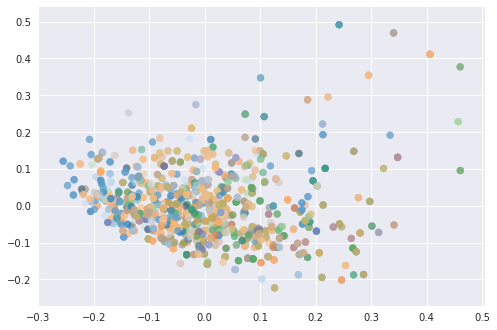

In [376]:
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=movies_genre_df['genre_id'], cmap='Vega20c', alpha=0.5)

## Normalize

In [372]:
from sklearn.preprocessing import normalize

In [373]:
normalized = normalize(reduced_data)

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


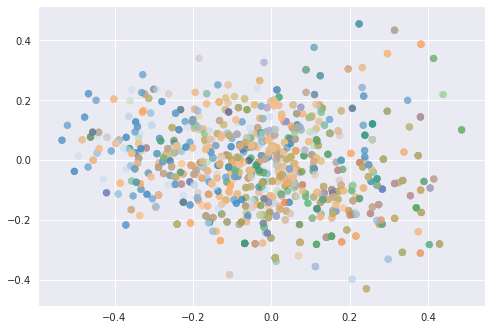

In [378]:
plt.scatter(normalized[:,0], normalized[:,1], c=movies_genre_df['genre_id'], cmap='Vega20c', alpha=0.5)